In [239]:
#Importing necessary packages
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F

ImportError: DLL load failed while importing _pywrap_tf2: A dynamic link library (DLL) initialization routine failed.

In [238]:
!pip install --upgrade tensorflow

## Project Overview

**Project Overview:**

This project revolves around predicting the sale price of residential homes in Ames, Iowa, using a dataset comprising 79 explanatory variables. The goal is to develop an accurate predictive model that considers various aspects of the properties, including physical characteristics, location, building materials, and amenities. By employing advanced regression techniques like random forest and gradient boosting, the project aims to uncover the key factors influencing price negotiations beyond traditional features like the number of bedrooms or a white-picket fence

**Data Description:**

The
The dataset used in this project, known as the Ames Housing dataset, contains detailed information about residential properties in Ames, Iowa. It encompasses 79 variables that describe various aspects of the homes, such as their physical attributes, location, building materials, and amenities. The dataset includes features like lot size, zoning classification, construction date, number of rooms, garage size, and many others. The target variable is the sale price of each property, and the dataset serves as a comprehensive resource for exploring the factors that influence housing prices. By leveraging this rich dataset, the project aims to gain insights into the relationships between these variables and the final sale prices of homes in Ames, I

**Data Source:**

This dataset is sourced fr:https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/dataomowa.

In [163]:
# To read the data and create dataframe
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data Preparation

**Column Visualization**

In [164]:
# First few lines of the data
df_train.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [165]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Data Quality Check**

In [166]:
# Describe the data in each column
column_descriptions = df_train.describe()

# Print the column descriptions
print(column_descriptions)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [167]:
# Check data types and missing values
print(df_train.info())

# Check for duplicates
print(df_train.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Handling Missing Data**

In [182]:
# To check for unique values in the columns with missing values
columns_to_check = [
    'LotFrontage', #Linear feet of street connected to property
    'Alley', #Type of alley access
    'MasVnrType', #Masonry veneer type
    'MasVnrArea', #Masonry veneer area in square feet
    'BsmtQual', #Height of the basement
    'BsmtCond', #General condition of the basement
    'BsmtExposure', #Walkout or garden level basement walls
    'BsmtFinType1', #Quality of basement finished area
    'BsmtFinType2', #Quality of second finished area (if present)
    'FireplaceQu', #Fireplace quality
    'GarageType', #Garage location
    'GarageYrBlt', #Year garage was built
    'GarageFinish', #Interior finish of the garage
    'GarageQual', #Garage quality
    'GarageCond', #Garage condition
    'Electrical', #Electrical system
    'PoolQC', #Pool quality
    'Fence', #Fence quality
    'MiscFeature', #Miscellaneous feature not covered in other categories
]

# Loop through each column and print unique values
for column in columns_to_check:
    unique_values = df_train[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in LotFrontage:
[ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.          83.          43.         103.
  93.          30.         129.         140.          35.
  37.         118.          87.         116.         150.
 111.          49.          96.          5

KeyError: 'PoolQC'

**Comments**

Based on the output of the unique values, it can be assumed that houses with NaN as Alley, do not have and can be replaced with None.
Also, since the PoolQC and Fence Column have very few values with > 40% missingness, they can be dropped. While the missing Lot Frontage values can be replaced with the meam.

In [169]:
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Reshape the column to a 2D array since SimpleImputer expects 2D input
column = df_train['LotFrontage'].values.reshape(-1, 1)

# Fit the imputer on the column with missing values
imputer.fit(column)

# Transform and fill missing values with the mean
df_train['LotFrontage'] = imputer.transform(column)

In [170]:

df_train['Alley'].fillna('None', inplace=True)
df_train.drop(['PoolQC'], axis=1, inplace=True)
df_train.drop(['Fence'], axis=1, inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\1582050104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Alley'].fillna('None', inplace=True)


In [171]:
df_train.query('MasVnrType.isna()')[['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [172]:
df_train.query('MasVnrArea.isna()')[['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


**Comment**

Since all values with NaN in MasVnrType have either 0 or NaN MasVnrArea, it can be assumed that MasVnrType is None and Nan in MasVnrArea replaced as 0

In [173]:
df_train['MasVnrType'].fillna('None', inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\484351135.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MasVnrType'].fillna('None', inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\484351135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [174]:
df_train.query('GarageType.isna()')[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


**Comments**

The NaN value is common to the 4 columns indicating that these houses do not have a Garage and will be replaced with none.

In [175]:
df_train['GarageType'].fillna('None', inplace=True)
df_train['GarageYrBlt'].fillna(0, inplace=True)
df_train['GarageFinish'].fillna('None', inplace=True)
df_train['GarageQual'].fillna('None', inplace=True)
df_train['GarageCond'].fillna('None', inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\4026256519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageType'].fillna('None', inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\4026256519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [176]:
df_train.query('FireplaceQu.isna()')[['FireplaceQu', 'Fireplaces']]

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
...,...,...
1452,NaN,0
1453,NaN,0
1454,NaN,0
1458,NaN,0


**Comments**
  
Since the number of Fireplaces for the FireplaceQU is 0, the NaN values can be replaced with None.

In [177]:
df_train['FireplaceQu'].fillna('None', inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\331244920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['FireplaceQu'].fillna('None', inplace=True)


In [178]:
df_train.query('BsmtFinType1.isna()')[['BsmtFinType1', 'BsmtFinType2','BsmtQual', 'BsmtCond', 'BsmtExposure']]

,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


**Comments**
  
All NaN values for BsmtFinType1, BsmtFinType2, BsmtQual, BsmtCond, BsmtExposure will be replaced as None.

In [179]:
df_train['BsmtFinType1'].fillna('None', inplace=True)
df_train['BsmtFinType2'].fillna('None', inplace=True)
df_train['BsmtQual'].fillna('None', inplace=True)
df_train['BsmtCond'].fillna('None', inplace=True)
df_train['BsmtExposure'].fillna('None', inplace=True)

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\3001109281.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtFinType1'].fillna('None', inplace=True)
C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\3001109281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [180]:
#Since all houses are nottr expected to have miscellaneous features
df_train['MiscFeature'].fillna('None', inplace=True)


C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\1110820842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MiscFeature'].fillna('None', inplace=True)


In [181]:
pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)).head(20)

,0
Electrical,1
Id,0
HalfBath,0
FireplaceQu,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0
BedroomAbvGr,0


## Outliers Detection

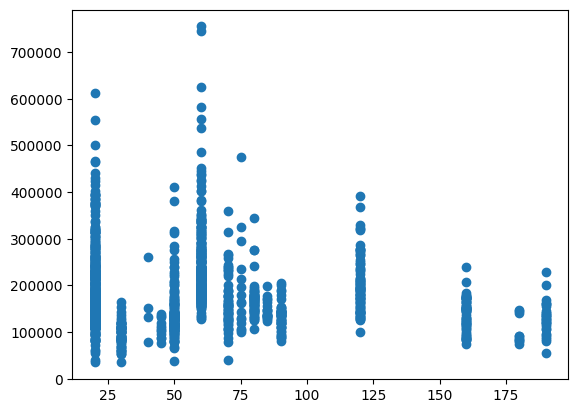

In [74]:
plt.scatter(x='MSSubClass', y='SalePrice', data=df_train)

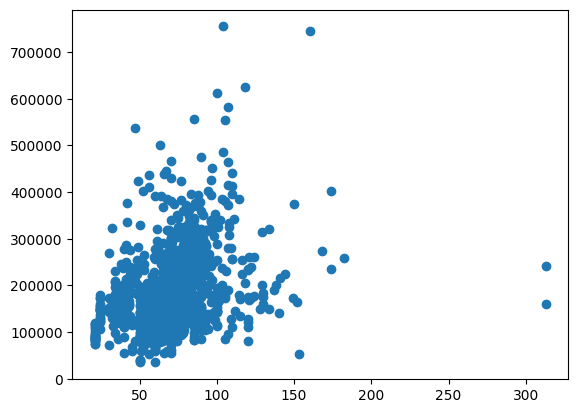

In [75]:
plt.scatter(x='LotFrontage', y='SalePrice', data=df_train)

In [76]:
df_train.query('LotFrontage > 300')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,None,IR2,HLS,AllPub,...,0,0,0,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,0,0,480,NaN,0,1,2008,New,Partial,160000


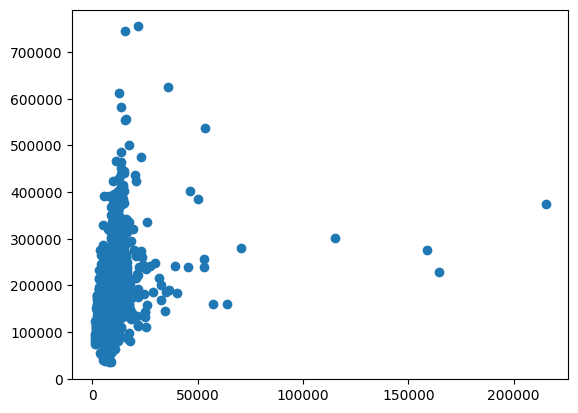

In [77]:
plt.scatter(x='LotArea', y='SalePrice', data=df_train)

In [78]:
df_train.query('LotArea > 55000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,70.049958,159000,Pave,None,IR2,Low,AllPub,...,0,0,0,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.000000,215245,Pave,None,IR3,Low,AllPub,...,0,0,0,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,70.049958,164660,Grvl,None,IR1,HLS,AllPub,...,0,0,0,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.000000,70761,Pave,None,IR1,Low,AllPub,...,0,0,0,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,70.049958,115149,Pave,None,IR2,Low,AllPub,...,0,0,0,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.000000,63887,Pave,None,IR3,Bnk,AllPub,...,0,0,480,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,70.049958,57200,Pave,None,IR1,Bnk,AllPub,...,0,0,0,NaN,0,6,2010,WD,Normal,160000


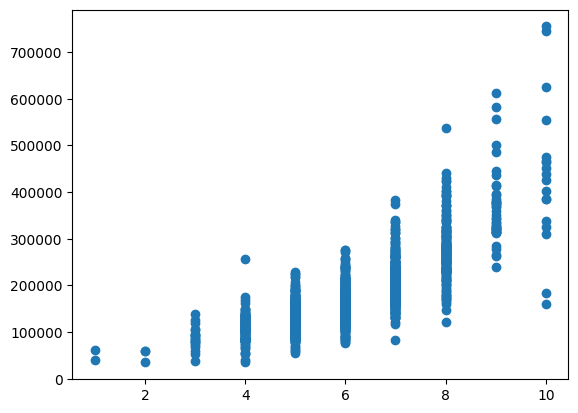

In [79]:
plt.scatter(x='OverallQual', y='SalePrice', data=df_train)

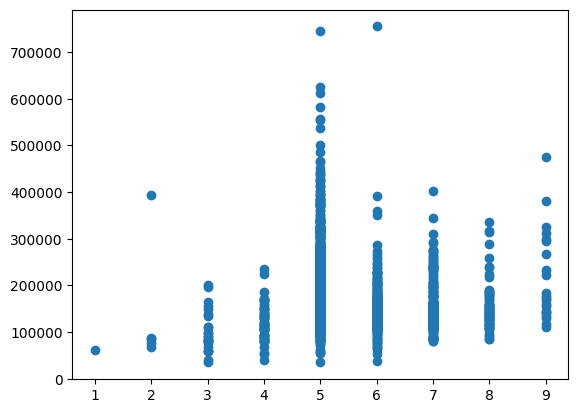

In [80]:
plt.scatter(x='OverallCond', y='SalePrice', data=df_train)

In [83]:
df_train.query('OverallCond == 5 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,...,0,0,555,NaN,0,7,2007,WD,Abnorml,745000


In [84]:
df_train.query('OverallCond == 6 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,...,0,0,0,NaN,0,1,2007,WD,Normal,755000


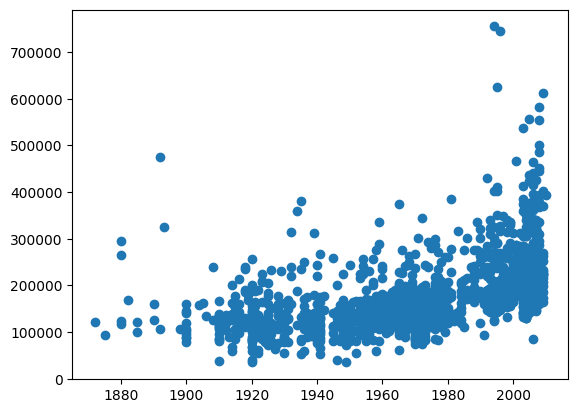

In [86]:
plt.scatter(x='YearBuilt', y='SalePrice', data=df_train)

In [87]:
df_train.query('YearBuilt < 1900 & SalePrice > 400000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,None,IR2,Lvl,AllPub,...,0,410,0,NaN,0,6,2006,WD,Normal,475000


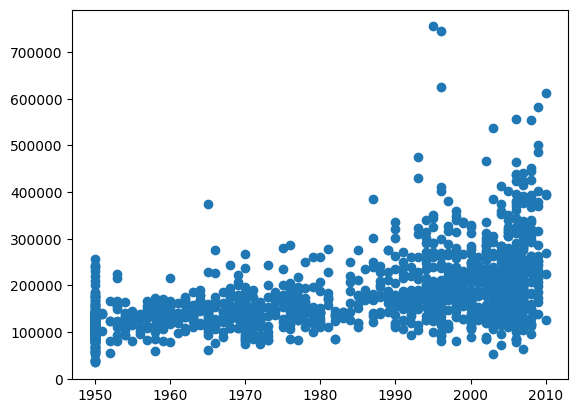

In [88]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=df_train)

In [89]:
df_train.query('YearRemodAdd < 1970 & SalePrice > 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,None,IR3,Low,AllPub,...,0,0,0,NaN,0,6,2009,WD,Normal,375000


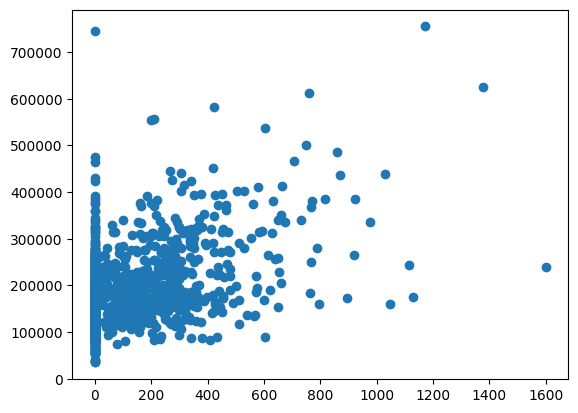

In [90]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=df_train)

In [92]:
df_train.query('MasVnrArea > 1500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,198,0,NaN,0,6,2007,WD,Normal,239000


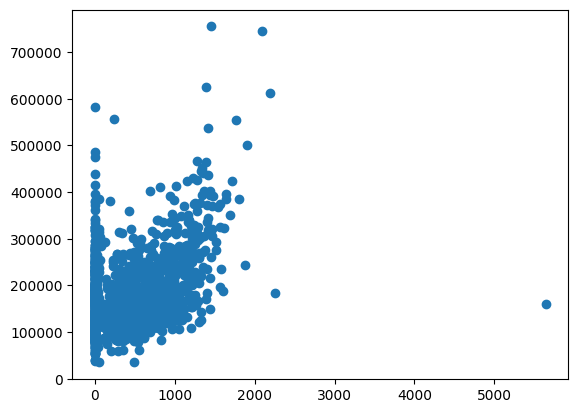

In [93]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=df_train)

In [94]:
df_train.query('BsmtFinSF1 > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,0,0,480,NaN,0,1,2008,New,Partial,160000


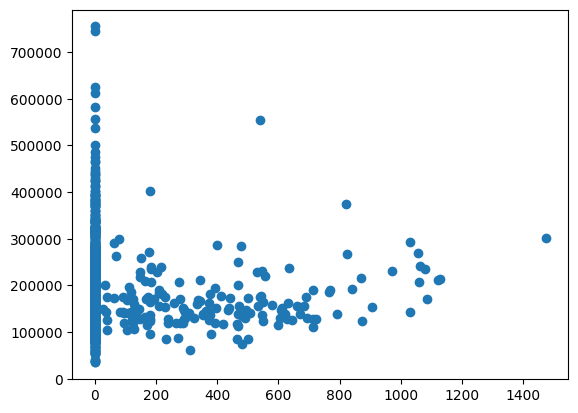

In [95]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=df_train)

In [96]:
df_train.query('BsmtFinSF2 > 400 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,None,Reg,Lvl,AllPub,...,0,170,0,NaN,0,4,2009,WD,Normal,555000


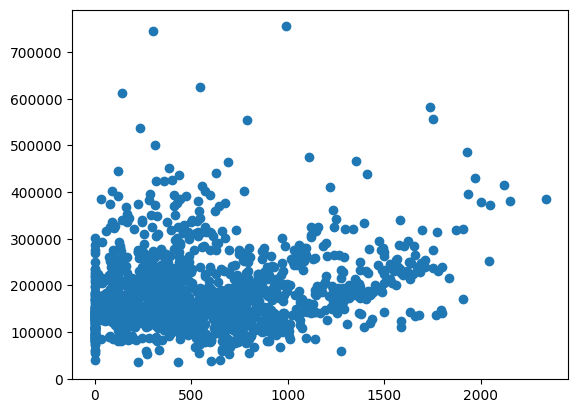

In [97]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=df_train)

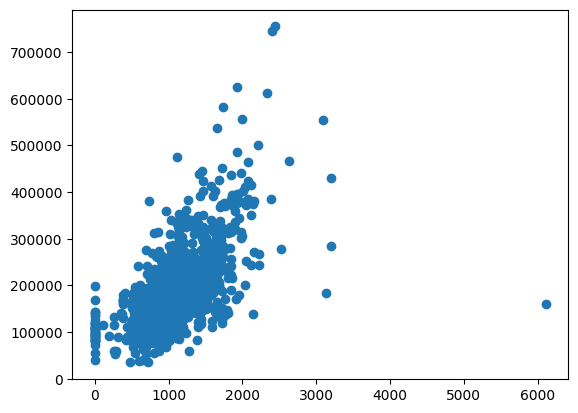

In [98]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df_train)

In [99]:
df_train.query('TotalBsmtSF > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,0,0,480,NaN,0,1,2008,New,Partial,160000


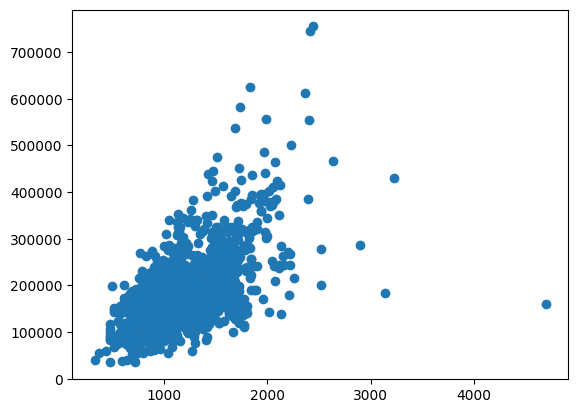

In [100]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=df_train)

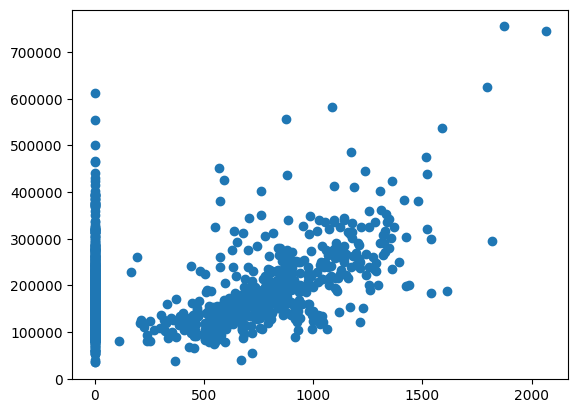

In [103]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=df_train)

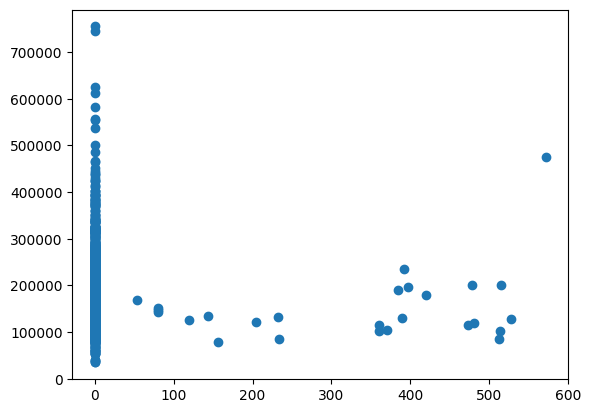

In [104]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=df_train)

In [107]:
df_train.query('LowQualFinSF > 560')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,None,IR2,Lvl,AllPub,...,0,410,0,NaN,0,6,2006,WD,Normal,475000


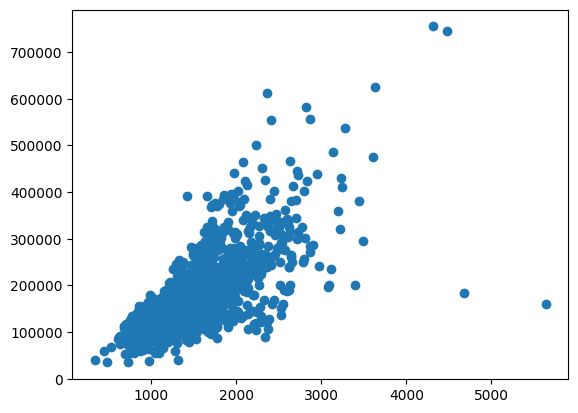

In [108]:
plt.scatter(x='GrLivArea', y='SalePrice', data=df_train)

In [109]:
df_train.query('GrLivArea > 4400')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,0,0,0,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,...,0,0,555,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,0,0,480,NaN,0,1,2008,New,Partial,160000


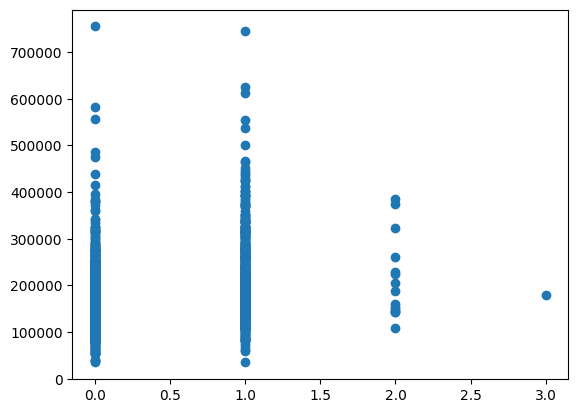

In [110]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=df_train)

In [111]:
df_train.query('BsmtFullBath == 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,3,2009,WD,Alloca,179000


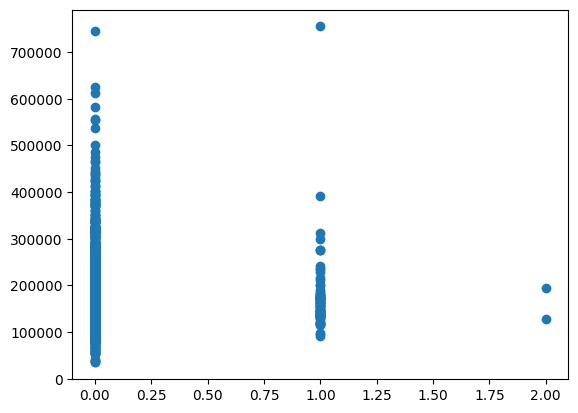

In [112]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=df_train)

In [113]:
df_train.query('BsmtHalfBath == 2')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,None,IR1,Lvl,AllPub,...,0,0,0,NaN,0,10,2006,WD,AdjLand,127500


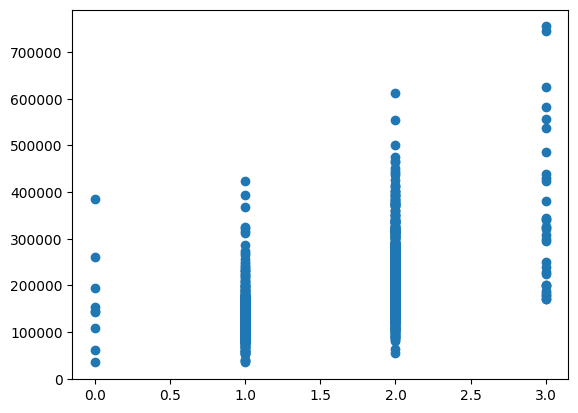

In [114]:
plt.scatter(x='FullBath', y='SalePrice', data=df_train)

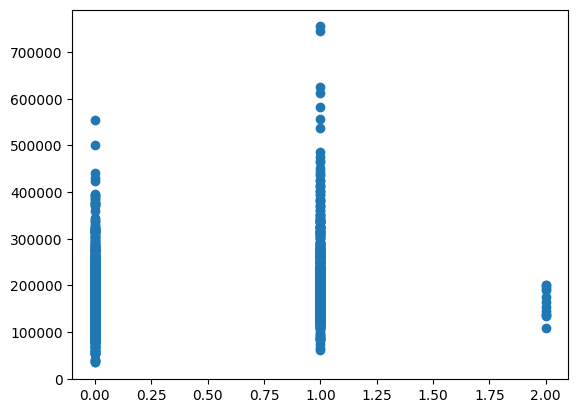

In [115]:
plt.scatter(x='HalfBath', y='SalePrice', data=df_train)

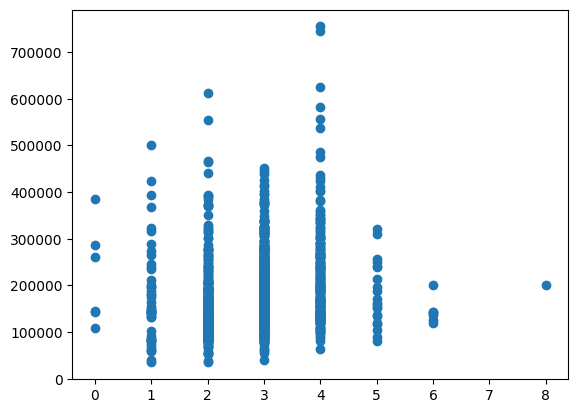

In [116]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=df_train)

In [117]:
df_train.query('BedroomAbvGr == 8')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,0,0,NaN,0,3,2007,WD,Abnorml,200000


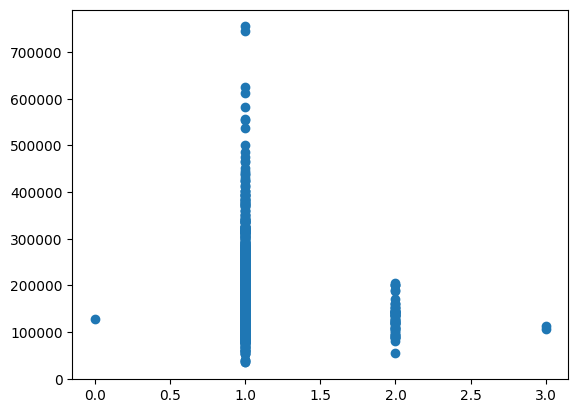

In [118]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=df_train)

In [119]:
df_train.query('KitchenAbvGr == 3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,11,2009,WD,Normal,106000


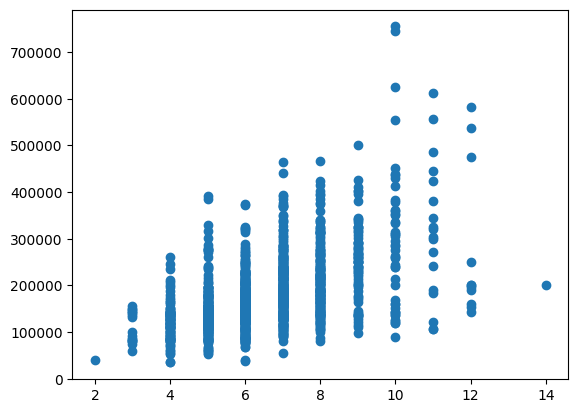

In [120]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df_train)

In [121]:
df_train.query('TotRmsAbvGrd == 14')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,0,0,NaN,0,3,2007,WD,Abnorml,200000


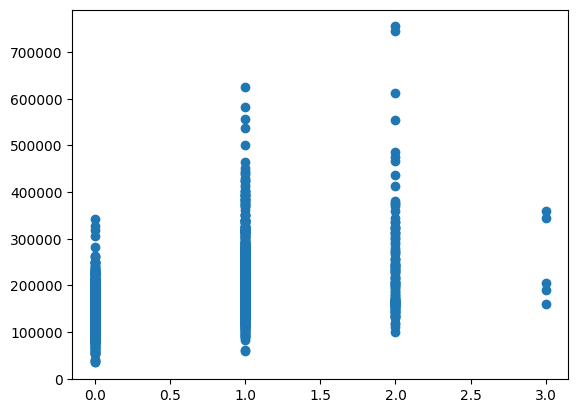

In [122]:
plt.scatter(x='Fireplaces', y='SalePrice', data=df_train)

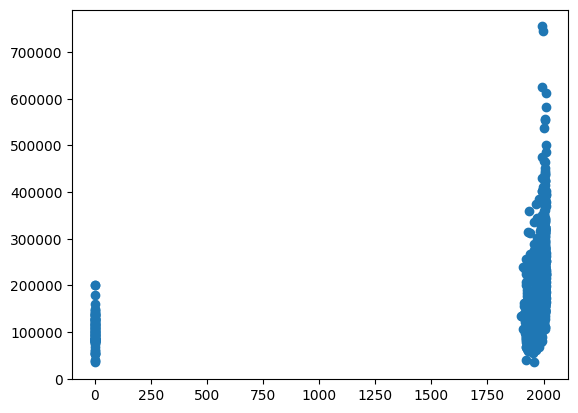

In [146]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=df_train)

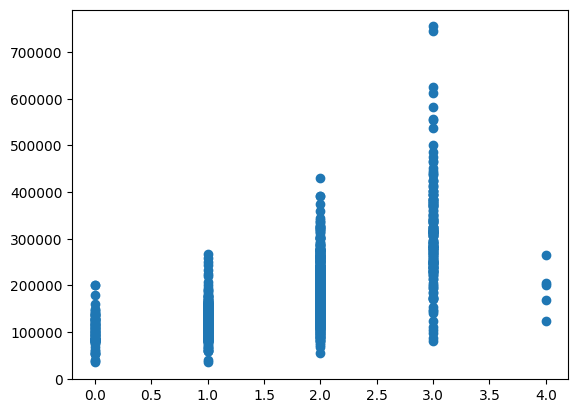

In [147]:
plt.scatter(x='GarageCars', y='SalePrice', data=df_train)

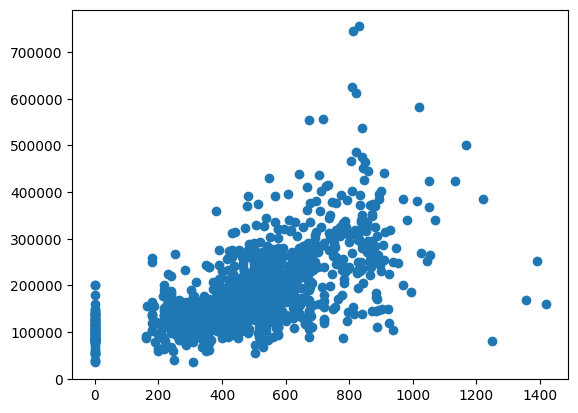

In [148]:
plt.scatter(x='GarageArea', y='SalePrice', data=df_train)

In [151]:
df_train.query('GarageArea > 1200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.000000,12704,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.000000,14803,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.000000,18000,Grvl,None,Reg,Low,AllPub,...,0,0,0,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,70.049958,32463,Pave,None,Reg,Low,AllPub,...,0,0,0,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.000000,63887,Pave,None,IR3,Bnk,AllPub,...,0,0,480,NaN,0,1,2008,New,Partial,160000


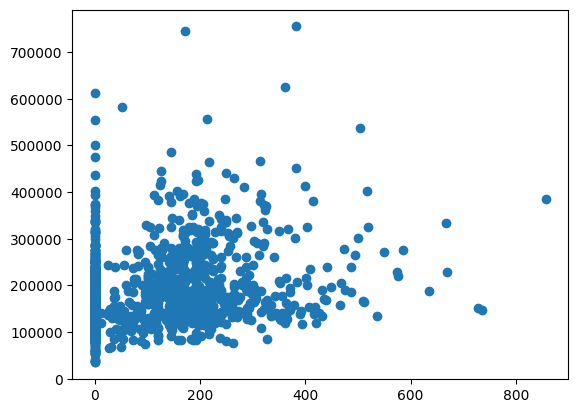

In [152]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df_train)

In [153]:
df_train.query('WoodDeckSF > 800')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,None,IR1,Low,AllPub,...,0,0,0,NaN,0,11,2006,WD,Normal,385000


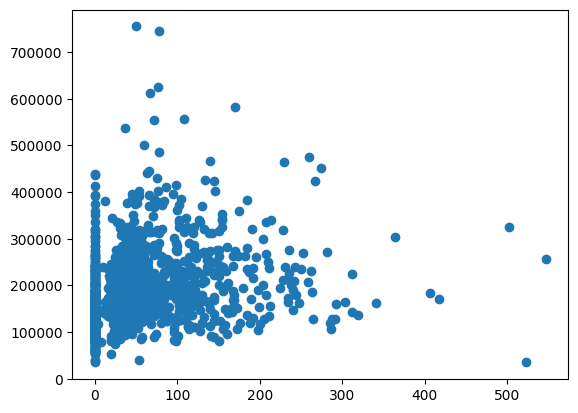

In [154]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df_train)

In [155]:
df_train.query('OpenPorchSF > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,None,Reg,Lvl,AllPub,...,0,0,0,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,480,0,Shed,1150,6,2008,WD,Normal,256000


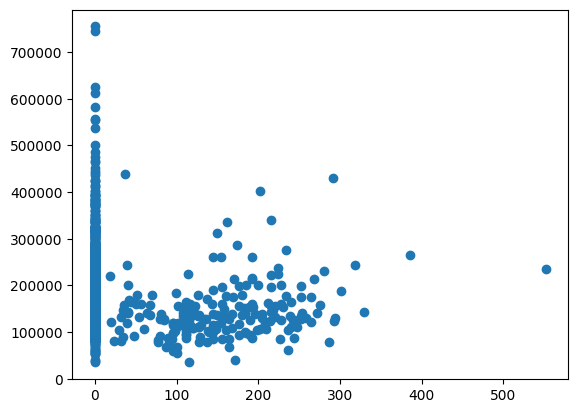

In [156]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df_train)

In [157]:
df_train.query('EnclosedPorch > 500')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,None,Reg,Lvl,AllPub,...,0,0,512,NaN,0,3,2006,WD,Abnorml,235000


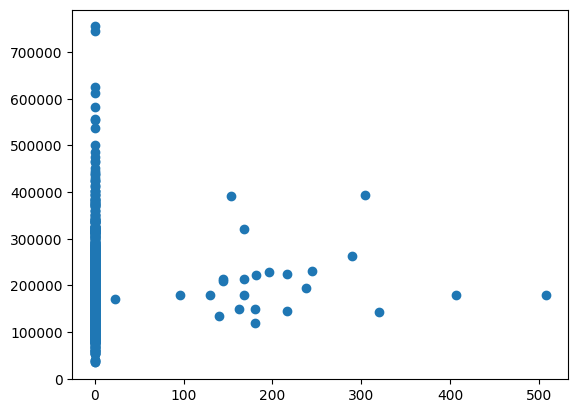

In [158]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=df_train)

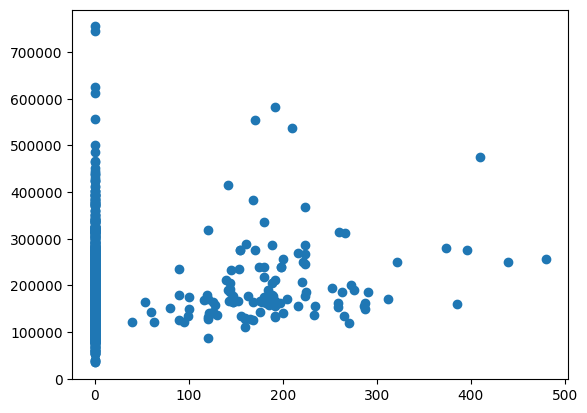

In [159]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=df_train)

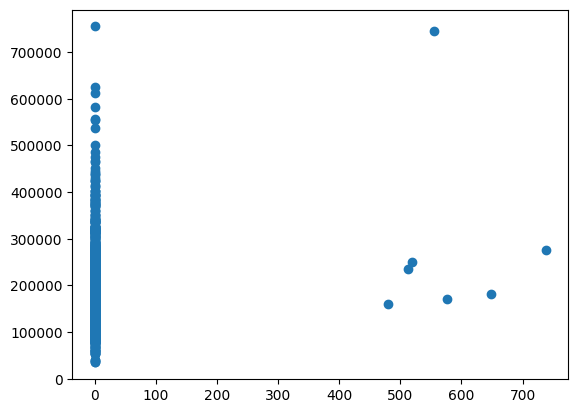

In [160]:
plt.scatter(x='PoolArea', y='SalePrice', data=df_train)

In [186]:
values = [598, 955, 935, 1299, 315,  1183, 692, 186, 441, 524, 739, 636, 1062, 1191, 496, 198, 1338, 298, 935, 49, 810, 582, 826, 584, 1329]

In [187]:
df_train = df_train[df_train.Id.isin(values) == False]

## Feature Engineering

In [190]:
df_train['houseage'] = df_train['YrSold'] - df_train['YearBuilt']

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\4165439171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['houseage'] = df_train['YrSold'] - df_train['YearBuilt']


In [191]:
df_train['houseremodelage'] = df_train['YrSold'] - df_train['YearRemodAdd']

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\2899286275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['houseremodelage'] = df_train['YrSold'] - df_train['YearRemodAdd']


In [192]:
df_train['totalsf'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\2783176333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['totalsf'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']


In [193]:
df_train['totalarea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\1928358436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['totalarea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']


In [194]:
df_train['totalbaths'] = df_train['BsmtFullBath'] + df_train['FullBath'] + 0.5 * (df_train['BsmtHalfBath'] + df_train['HalfBath']) 

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\24691096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['totalbaths'] = df_train['BsmtFullBath'] + df_train['FullBath'] + 0.5 * (df_train['BsmtHalfBath'] + df_train['HalfBath'])


In [195]:
df_train['totalporchsf'] = df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF']

C:\Users\boluw\AppData\Local\Temp\ipykernel_6572\2105757419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['totalporchsf'] = df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF']


In [196]:
df_train = df_train.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

## Exploratory Data Analysis

<Axes: >

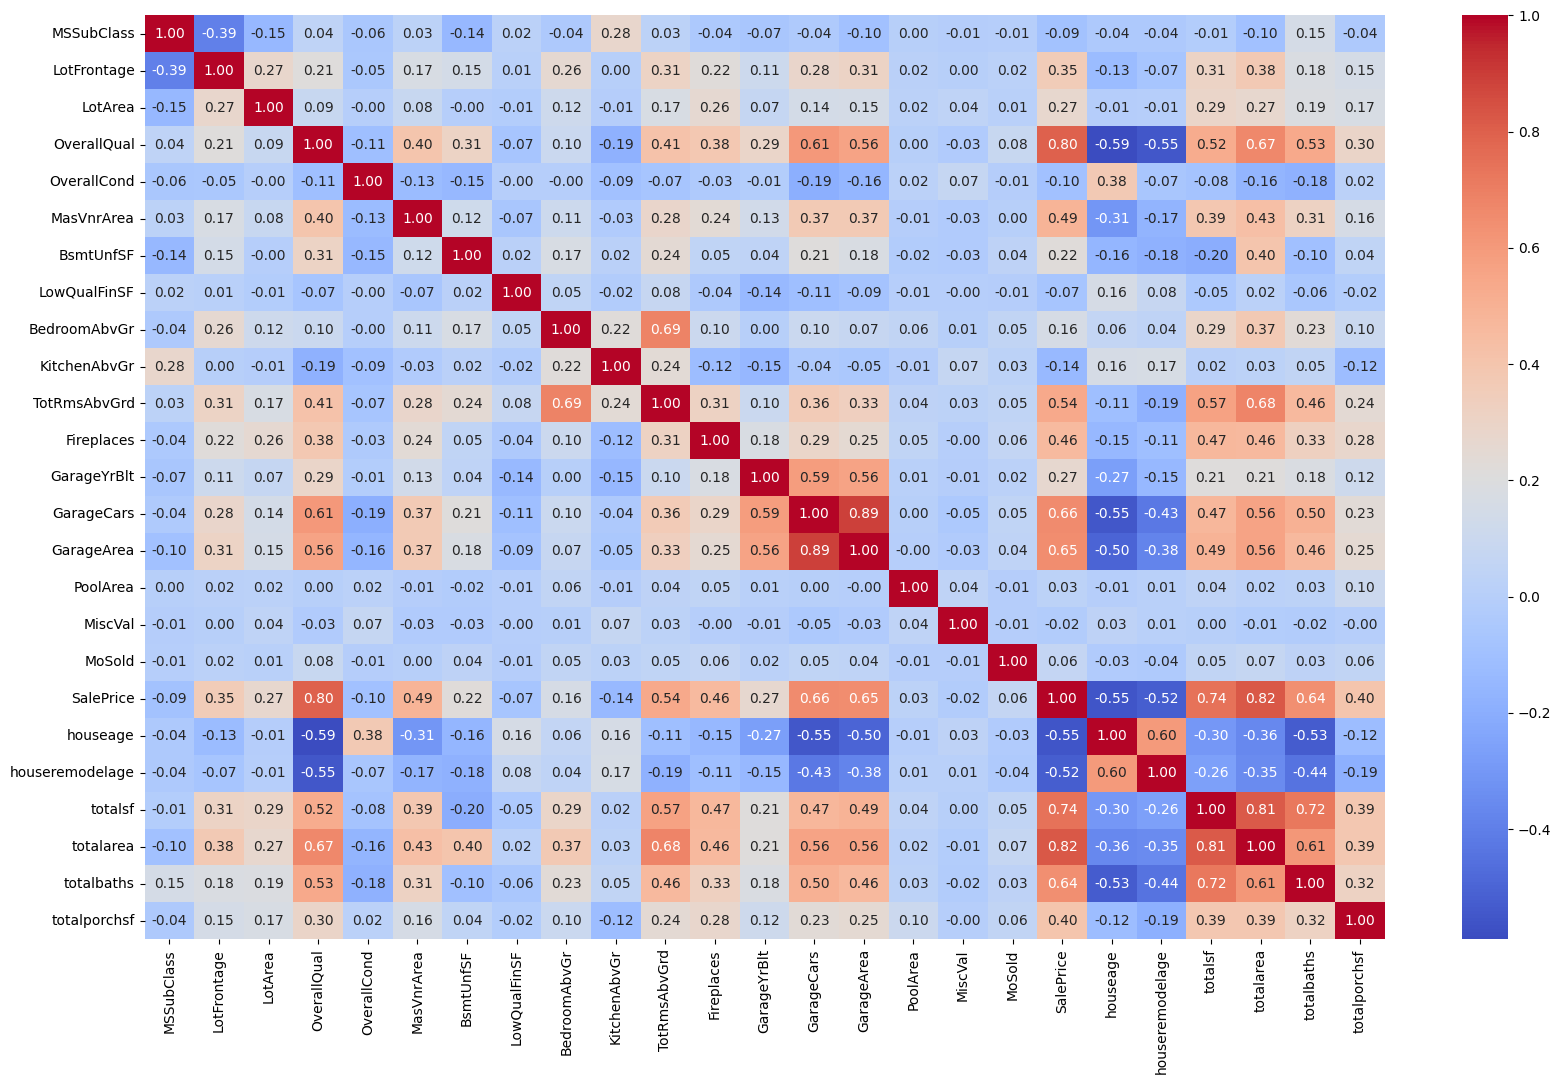

In [197]:
correlation_matrix = df_train.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

**Comments**
  
To avoid multicolinarity between GarageArea and GarageCars, GarageArea column will be dropped.

In [199]:
df_train = df_train.drop(columns=['GarageArea'])

KeyError: "['GarageArea'] not found in axis"

<Axes: xlabel='SalePrice', ylabel='Count'>

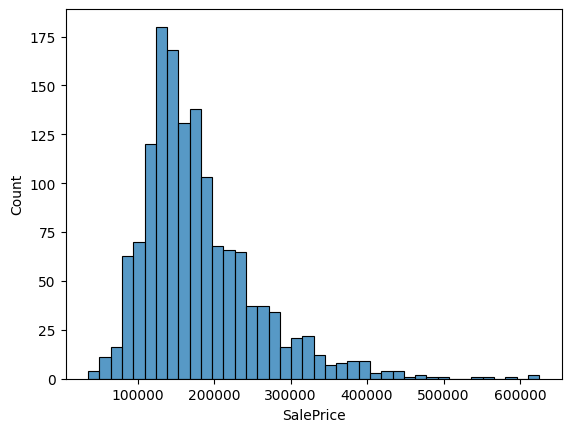

In [200]:
sns.histplot(
    df_train,
    x=df_train['SalePrice']
)

In [201]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

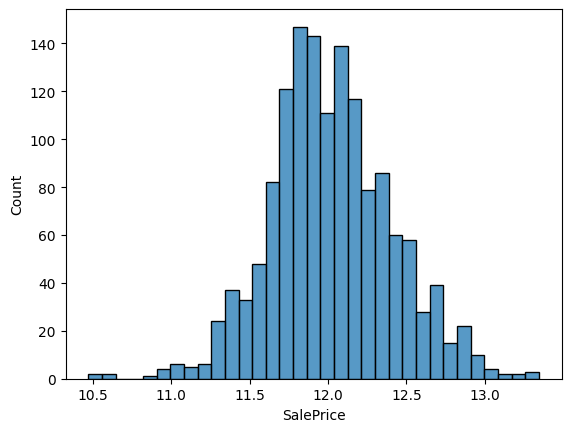

In [202]:
sns.histplot(
    df_train,
    x=df_train['SalePrice']
)

In [203]:
df_train.dtypes[df_train.dtypes=='object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
MiscFeature      object
SaleType         object
SaleCondition    object
dtype: object

In [204]:
df_train.dtypes[df_train.dtypes !='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageYrBlt        float64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

In [205]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1', 'BsmtFinType2',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'GarageCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [206]:
ohe_cols = ['Alley', 'Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl', 'MiscFeature']

In [207]:
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [208]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [209]:
ode_pipeline = Pipeline(steps=[
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [210]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [211]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [212]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [213]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [214]:
X_preprocessed = pipeline.fit_transform(X)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

## Model Development

In [216]:
lr = LinearRegression()

In [217]:
lr.fit(X_train, y_train)

LinearRegression()

In [218]:
y_pred_lr = lr.predict(X_test)

In [219]:
mean_squared_error(y_test, y_pred_lr)

2.684233132636934e+19

In [220]:
XGB = XGBRegressor(random_state=13)

In [221]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [222]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [223]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [224]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11403537182269283

## Training with TensorFlow

In [225]:
X_train.shape

(1148, 203)

In [226]:
inputs = tf.keras.Input(shape=(88,))
hidden = tf.keras.layers.Dense(64, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

tf_model = tf.keras.Model(inputs, outputs)


tf_model.compile(
    optimizer='adam',
    loss='mse'
)


history = tf_model.fit(
    X_train,
    y_train,
    validation_split=0.12,
    batch_size=32,
    epochs=10
)

NameError: name 'tf' is not defined